In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Linear Regression

Write about Linear Regression and equations

## The Normal Equation

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

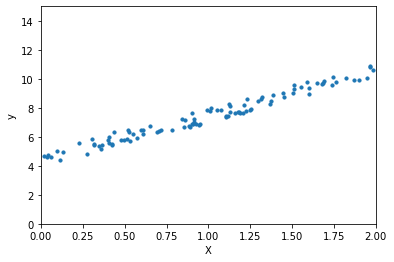

In [3]:
plt.scatter(X, y, s=10)
plt.xlabel("X")
plt.ylabel("y")
plt.axis([0, 2, 0, 15])

plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.3970658],
       [3.0701272]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.3970658],
       [10.5373202]])

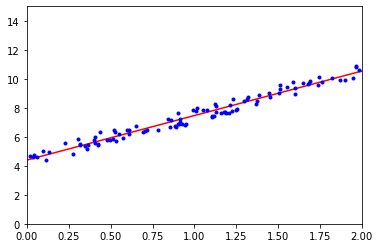

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.3970658]), array([[3.0701272]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.3970658],
       [10.5373202]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.3970658],
       [3.0701272]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.3970658],
       [3.0701272]])

## Gradient Descent

Write about Gradient Descent

#### Barch Gradient Descent

#### Stochastic Gradient Descent